In [1]:
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from os.path import join
from pandas import DataFrame

In [17]:
dataframes = []
for trainer in ["FedRL", "MARL", "SARL"]:
    for inter in ["complex_inter", "single_inter", "two_inter"]:
        for ranked in ["ranked", "unranked"]:
            dirs = glob.glob(join("out", "data", trainer, inter, f"{ranked}*.csv"))
            most_recent_file = sorted(dirs, key=lambda x: os.stat(x).st_mtime)[-1]
            print(most_recent_file)
            df = pd.read_csv(most_recent_file)
            df["trainer"] = [trainer] * len(df)
            df["netfile"] = [inter] * len(df)
            df["ranked"] = [ranked] * len(df)
            dataframes.append(df)

data = pd.concat(dataframes)
data.head()

out/data/FedRL/complex_inter/ranked_36.csv
out/data/FedRL/complex_inter/unranked_4.csv
out/data/FedRL/single_inter/ranked_3.csv
out/data/FedRL/single_inter/unranked_3.csv
out/data/FedRL/two_inter/ranked_4.csv
out/data/FedRL/two_inter/unranked_4.csv
out/data/MARL/complex_inter/ranked_6.csv
out/data/MARL/complex_inter/unranked_4.csv
out/data/MARL/single_inter/ranked_3.csv
out/data/MARL/single_inter/unranked_3.csv
out/data/MARL/two_inter/ranked_4.csv
out/data/MARL/two_inter/unranked_4.csv
out/data/SARL/complex_inter/ranked_6.csv
out/data/SARL/complex_inter/unranked_4.csv
out/data/SARL/single_inter/ranked_3.csv
out/data/SARL/single_inter/unranked_3.csv
out/data/SARL/two_inter/ranked_4.csv
out/data/SARL/two_inter/unranked_4.csv


,Unnamed: 0,round,trainer,policy,fed_round,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,...,pid,hostname,node_ip,config,time_since_restore,timesteps_since_restore,iterations_since_restore,perf,netfile,ranked
0,0,0,FedRL,gneJ0,False,-1052.892041,-1052.892041,-1052.892041,1951.0,1,...,13060,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",122.81222,0,1,"{'cpu_util_percent': 16.30346820809249, 'ram_u...",complex_inter,ranked
1,1,0,FedRL,gneJ1,False,-1052.892041,-1052.892041,-1052.892041,1951.0,1,...,13060,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",122.81222,0,1,"{'cpu_util_percent': 16.30346820809249, 'ram_u...",complex_inter,ranked
2,2,0,FedRL,gneJ13,False,-1052.892041,-1052.892041,-1052.892041,1951.0,1,...,13060,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",122.81222,0,1,"{'cpu_util_percent': 16.30346820809249, 'ram_u...",complex_inter,ranked
3,3,0,FedRL,gneJ2,False,-1052.892041,-1052.892041,-1052.892041,1951.0,1,...,13060,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",122.81222,0,1,"{'cpu_util_percent': 16.30346820809249, 'ram_u...",complex_inter,ranked
4,4,0,FedRL,gneJ3,False,-1052.892041,-1052.892041,-1052.892041,1951.0,1,...,13060,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",122.81222,0,1,"{'cpu_util_percent': 16.30346820809249, 'ram_u...",complex_inter,ranked


In [18]:
data["trainer"].unique()

array(['FedRL', 'MARL', 'SARL'], dtype=object)

In [11]:
def load_data(trainer, topo, ranked) -> pd.DataFrame:
    """This function simply merges all the latest training data into
       a single Pandas DataFrame object for straightforward analysis.

    Args:
        trainer (str): Name of the trainer type.
        topo (str): Name of the topology.
        ranked (bool): Whether ranked or not.

    Returns:
        pd.DataFrame -- Merged data set of latest training processes.
    """
    directory = join("out", "data", trainer, topo)
    ranked = "ranked" if ranked else "unranked"
    path = sorted(glob.glob(join(directory, f"{ranked}_*.csv")))[-1]
    data = pd.read_csv(path)
    return data

dataframes = []
for trainer in ["FedRL", "MARL", "SARL"]:
    for topo in ["complex_inter", "single_inter", "two_inter"]:
        for ranked in [True, False]:
            df = load_data(trainer, topo, ranked)
            df["trainer"] = [trainer] * len(df)
            df["netfile"] = [topo]    * len(df)
            df["ranked"]  = [ranked]  * len(df)
            dataframes.append(df)

training_data = pd.concat(dataframes)
training_data.head()

,Unnamed: 0,round,trainer,policy,fed_round,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,...,pid,hostname,node_ip,config,time_since_restore,timesteps_since_restore,iterations_since_restore,perf,netfile,ranked
0,0,0,FedRL,gneJ0,False,NaN,NaN,NaN,NaN,0,...,19304,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",171.644001,0,1,"{'cpu_util_percent': 17.403719008264463, 'ram_...",complex_inter,True
1,1,0,FedRL,gneJ1,False,NaN,NaN,NaN,NaN,0,...,19304,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",171.644001,0,1,"{'cpu_util_percent': 17.403719008264463, 'ram_...",complex_inter,True
2,2,0,FedRL,gneJ13,False,NaN,NaN,NaN,NaN,0,...,19304,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",171.644001,0,1,"{'cpu_util_percent': 17.403719008264463, 'ram_...",complex_inter,True
3,3,0,FedRL,gneJ2,False,NaN,NaN,NaN,NaN,0,...,19304,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",171.644001,0,1,"{'cpu_util_percent': 17.403719008264463, 'ram_...",complex_inter,True
4,4,0,FedRL,gneJ3,False,NaN,NaN,NaN,NaN,0,...,19304,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",171.644001,0,1,"{'cpu_util_percent': 17.403719008264463, 'ram_...",complex_inter,True


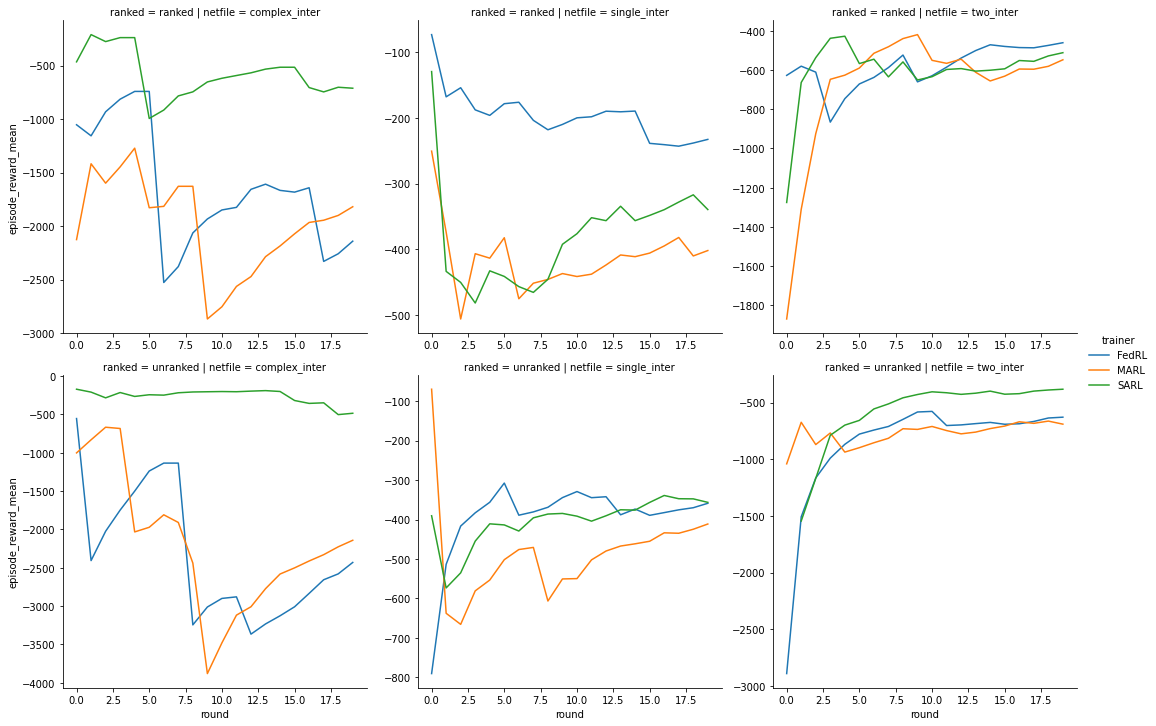

In [19]:
sns.relplot(
    data=data, 
    kind="line", 
    row="ranked",
    col="netfile",
    hue="trainer",
    x="round", 
    y="episode_reward_mean", 
    ci=None,
    facet_kws={"sharex": False, "sharey": False}
)
plt.show()

# Initial Observation (SARL)
It is... bizarre that SARL is doing so poorly relative to MARL and FedRL in the `single_inter` road network. The reason this is strange is that thre isn't really a logical difference between SARL and the multi-agent approaches (i.e., MARL and FedRL). In all cases, there is only *one* policy being trained under `single_inter`.

In [20]:
sns.relplot(
    data=data, 
    kind="line", 
    style="ranked", 
    hue="kind", 
    col="netfile", 
    x="step", 
    y="cum_reward", 
    ci=None,
    facet_kws={"sharey": False, "sharex": False}
)
plt.savefig("reward_over_time.pdf")
plt.show()

ValueError: Could not interpret value `step` for parameter `x`

In [21]:
g = sns.relplot(data=data, kind="line", style="ranked", hue="kind", col="netfile", x="episode", y="cum_reward", facet_kws={"sharey": False})
plt.show()

ValueError: Could not interpret value `episode` for parameter `x`

In [22]:
sns.catplot(data=data, kind="bar", col="ranked", row="netfile", x="kind", y="cum_reward", ci=None)
plt.savefig("ranked_v_unranked.pdf")
plt.show()

ValueError: Could not interpret input 'kind'

In [ ]:
# list(training_data.columns)
training_data.dtypes